# Scatter Plots

Scatter plots let us see the relationship between two variables. They can be used to identify trends, clusters, and outliers.

In football analytics, scatter plots are often used to compare how a team or player performs in different metrics. 

For example, we can use a scatter plot to compare a team's expected goals and actual goals. This can help us identify if a team is overperforming or underperforming in terms of goals scored.

A shotmap as well is just a type of scatter plot, where the x and y axis are the x and y coordinates of the shots.

So while scatter plots are simple, they are very powerful and can be used to answer a wide range of questions.

In [71]:
import pandas as pd

import matplotlib.pyplot as plt

# Scrape the data from fbref.com from the 2023/2024 season
url = 'https://fbref.com/en/comps/Big5/2023-2024/2023-2024-Big-5-European-Leagues-Stats'

df = pd.read_html(url, attrs={'id': 'big5_table'})[0]
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Leverkusen,de GER,1,21,17,4,0,55,14,...,55,2.62,43.8,18.9,24.9,1.18,W W D W W,29957,Victor Boniface - 10,Lukáš Hrádecký
1,2,Inter,it ITA,1,23,19,3,1,55,12,...,60,2.61,47.4,18.9,28.5,1.24,W W W W W,66221,Lautaro Martínez - 19,Yann Sommer
2,3,Real Madrid,es ESP,1,24,19,4,1,52,15,...,61,2.54,44.5,22.4,22.1,0.92,W W W D W,71196,Jude Bellingham - 16,"Kepa Arrizabalaga, Andriy Lunin"
3,4,Bayern Munich,de GER,2,21,16,2,3,59,22,...,50,2.38,54.9,17.3,37.6,1.79,L W W W L,75000,Harry Kane - 24,Manuel Neuer
4,5,Paris S-G,fr FRA,1,21,15,5,1,51,18,...,50,2.38,44.7,24.3,20.4,0.97,W W D W W,46972,Kylian Mbappé - 20,Gianluigi Donnarumma


Text(0.5, 1.0, 'Goals vs Expected Goals in 2023/2024\nEuropean Big 5 leagues')

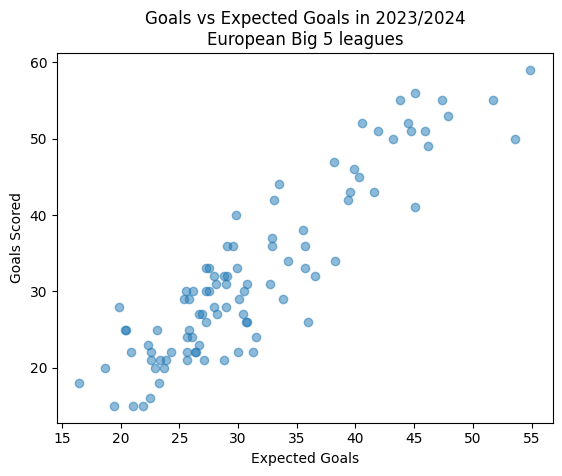

In [72]:
# Let's plot a scatter plot of expected goals vs goals
fig, ax = plt.subplots()

ax.scatter(df['xG'], df['GF'], alpha=0.5)

ax.set_xlabel('Expected Goals')
ax.set_ylabel('Goals Scored')
ax.set_title('Goals vs Expected Goals in 2023/2024\nEuropean Big 5 leagues')


### Lets think about what we are trying to show with the scatter plot. 

We are trying to show if a team is overperforming or underperforming in terms of goals scored.
So we can add a line where the x and y axis are equal. This line represents the expected goals and the actual goals being equal. If a team is above this line, they are overperforming, and if they are below, they are underperforming.

In [73]:
# Add a line where x and y are equal only up to the maximum value of x and y
ax.plot([15, 80], [15, 80], color='black', linestyle='--')

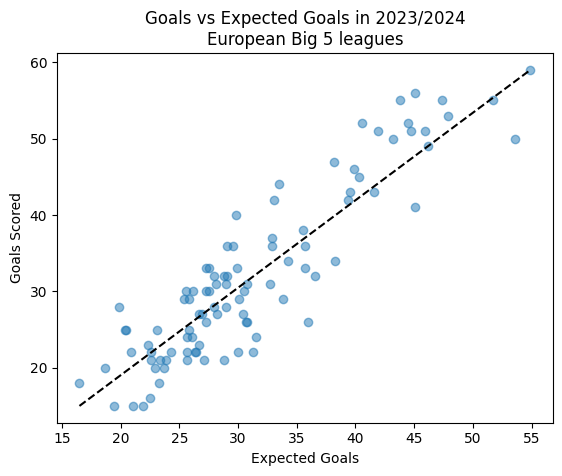

In [74]:
# Show the plot
fig

### Now we can see which teams are overperforming and underperforming in terms of goals scored.

let's add the team names to some of the biggest outliers

In [75]:
# Calculate the biggest outliers
df['difference'] = df['GF'] - df['xG']
overperformers = df.nlargest(5, 'difference')
underperformers = df.nsmallest(5, 'difference')

# Add the team names to the plot
for i in range(5):
    ax.text(overperformers.iloc[i]['xG'], overperformers.iloc[i]['GF'], overperformers.iloc[i]['Squad'])
    ax.text(underperformers.iloc[i]['xG'], underperformers.iloc[i]['GF'], underperformers.iloc[i]['Squad'])

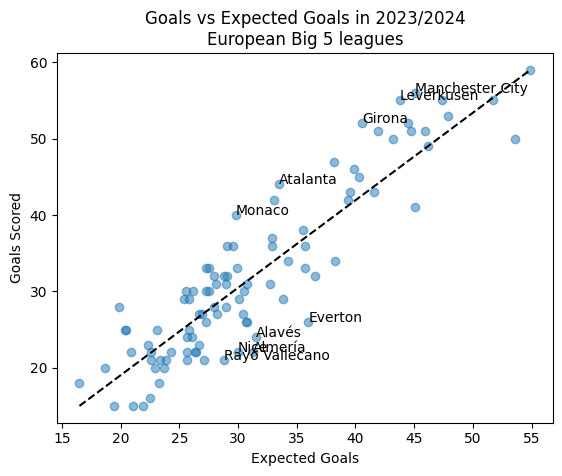

In [76]:
fig

In [77]:
# Let's add quandrant labels to the plot
ax.text(min_x, max_y - 5, 'Overperforming xG', ha='left', va='bottom')
ax.text(max_x, min_y + 5, 'Underperforming xG', ha='right', va='bottom')

Text(54.9, 20, 'Underperforming xG')

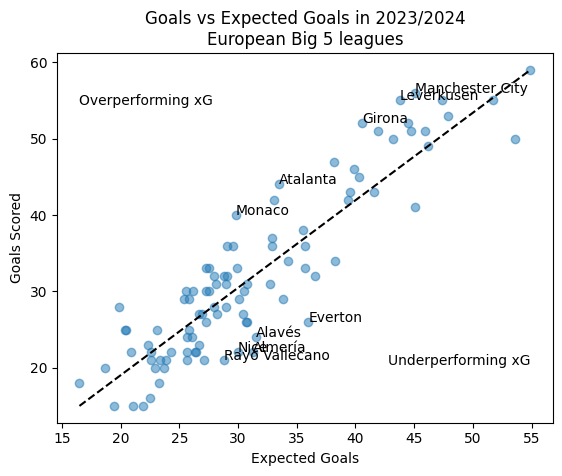

In [78]:
fig